In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
import missingno as msno
import warnings 

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# Acquire

**Data Source**

https://www.kaggle.com/datasets/thedevastator/std-infection-rates-in-america-1996-2008

In [2]:
''' reading dataset  df1 '''
df1 = pd.read_csv('STD_Cases.csv')

In [3]:
df1.shape

(42680, 11)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42680 entries, 0 to 42679
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          42680 non-null  int64  
 1   Disease        42530 non-null  object 
 2   Disease Code   42530 non-null  float64
 3   State          42530 non-null  object 
 4   Year           42530 non-null  float64
 5   Gender         42530 non-null  object 
 6   Age            42530 non-null  object 
 7   Age Code       42530 non-null  object 
 8   STD Cases      42530 non-null  float64
 9   Population     35483 non-null  float64
 10  Rate per 100K  35483 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.6+ MB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42680 entries, 0 to 42679
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          42680 non-null  int64  
 1   Disease        42530 non-null  object 
 2   Disease Code   42530 non-null  float64
 3   State          42530 non-null  object 
 4   Year           42530 non-null  float64
 5   Gender         42530 non-null  object 
 6   Age            42530 non-null  object 
 7   Age Code       42530 non-null  object 
 8   STD Cases      42530 non-null  float64
 9   Population     35483 non-null  float64
 10  Rate per 100K  35483 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.6+ MB


<AxesSubplot:>

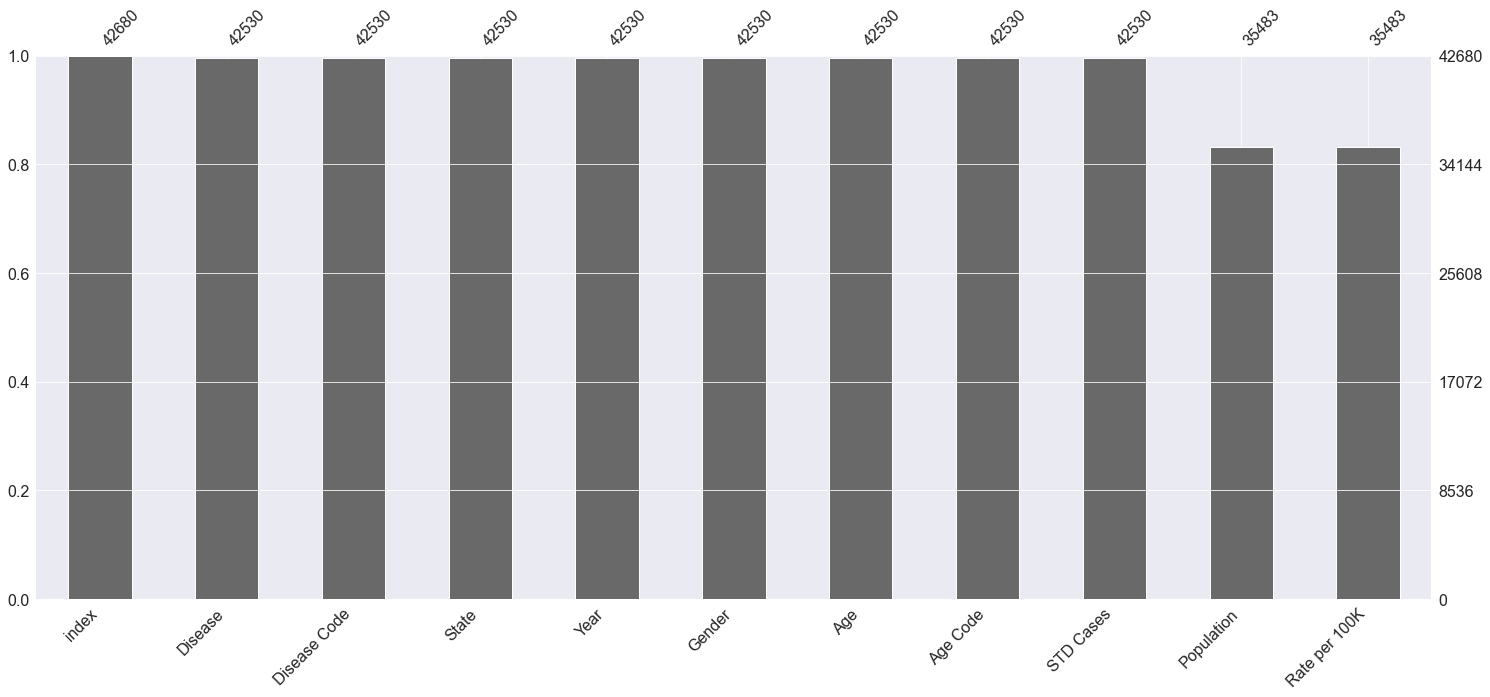

In [6]:
msno.bar(df1)

**Takeaways**

- 42680 rows and 11 columns.
- Have null values that need to be addressed. Either drop nulls or find reasonable method to imput null values.
- will need to convert some data types like `Year`

**Things to do**

- Complete data dictionary
- Preview Data to see actual values
- Come up with some hypothesis to plan project goals.


**Data Dictionary**

Column name	      |Description
Disease	          The name of the STD. (String)
Disease Code	  The code for the STD. (String)
State	          The state where the STD was found. (String)
Year	          The year the STD was found. (Integer)
Gender	          The gender of the person with the STD. (String)
Age	              The age of the person with the STD. (Integer)
Age Code	      The code for the age group of the person with the STD. (String)
STD Cases	      The number of STD cases. (Integer)
Population	      The population of the state where the STD was found. (Integer)
Rate per 100K	  The rate of STD cases per 100,000 people. (Float)

In [7]:
df1

,index,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29
...,...,...,...,...,...,...,...,...,...,...,...
42675,42675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42676,42676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42677,42677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42678,42678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2 = df1.dropna(axis=0, subset=('Disease', ))

In [9]:
df2.shape[1]

11

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42530 entries, 0 to 42629
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          42530 non-null  int64  
 1   Disease        42530 non-null  object 
 2   Disease Code   42530 non-null  float64
 3   State          42530 non-null  object 
 4   Year           42530 non-null  float64
 5   Gender         42530 non-null  object 
 6   Age            42530 non-null  object 
 7   Age Code       42530 non-null  object 
 8   STD Cases      42530 non-null  float64
 9   Population     35483 non-null  float64
 10  Rate per 100K  35483 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.9+ MB


<AxesSubplot:>

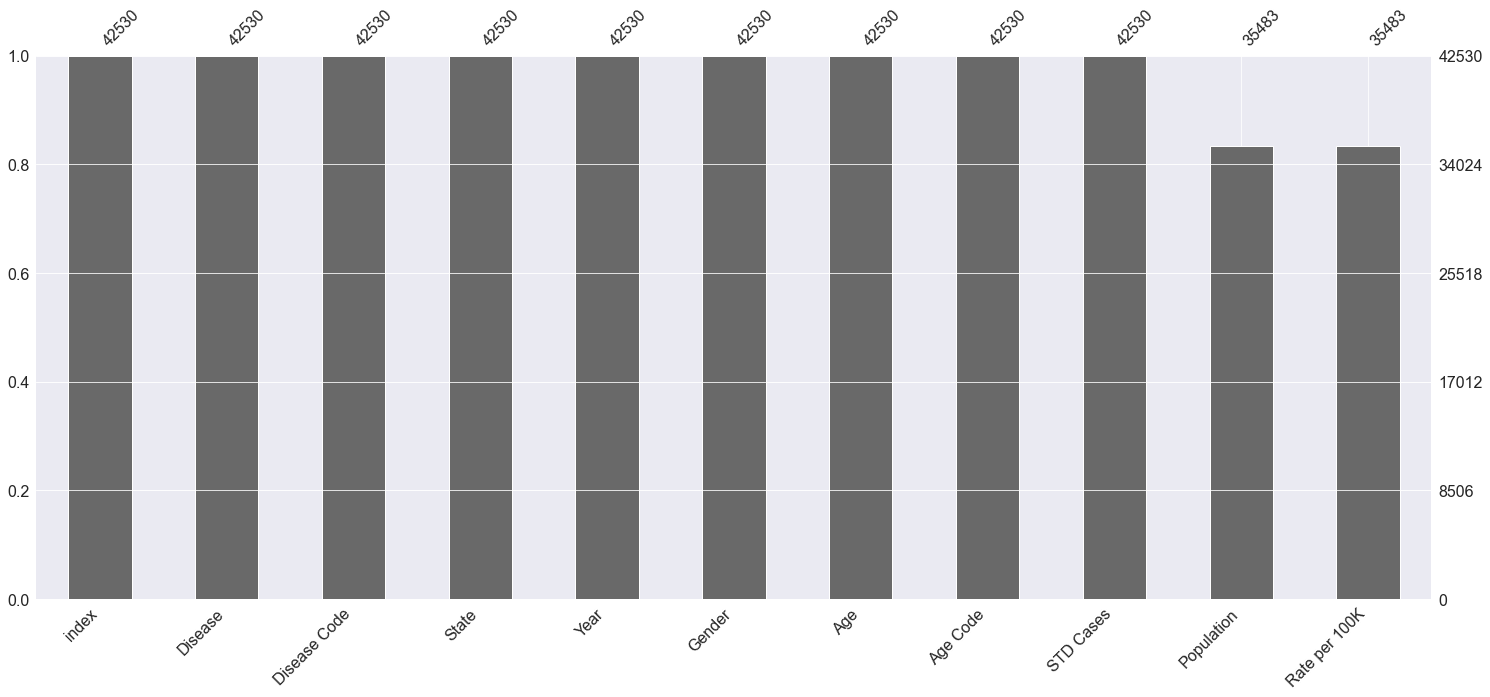

In [11]:
# Bar Chart of all values per column in data. 
msno.bar(df2)

In [12]:
df2

,index,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29
...,...,...,...,...,...,...,...,...,...,...,...
42625,42625,Primary and Secondary Syphilis,310.0,Wyoming,2004.0,Female,30-34 years,30-34,1.0,14577.0,6.86
42626,42626,Primary and Secondary Syphilis,310.0,Wyoming,2007.0,Female,40+ years,40+,1.0,123292.0,0.81
42627,42627,Primary and Secondary Syphilis,310.0,Wyoming,2008.0,Female,20-24 years,20-24,1.0,18026.0,5.55
42628,42628,Primary and Secondary Syphilis,310.0,Wyoming,2008.0,Female,30-34 years,30-34,1.0,15691.0,6.37


In [18]:
df2.columns

Index(['Disease', 'Disease Code', 'State', 'Year', 'Gender', 'Age',
       'STD Cases', 'Population', 'Rate per 100K'],
      dtype='object')

In [17]:
# Drop Columns not needed
df2.drop(columns=['index', 'Age Code'], inplace=True)

# Convert Column data types
df2['Disease Code'] = df2['Disease Code'].astype('int64')


In [19]:
df2

,Disease,Disease Code,State,Year,Gender,Age,STD Cases,Population,Rate per 100K
0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,25.0,468394.0,5.34
1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,164.0,165920.0,98.84
2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,193.0,152848.0,126.27
3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,88.0,152778.0,57.60
4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,55.0,155850.0,35.29
...,...,...,...,...,...,...,...,...,...
42625,Primary and Secondary Syphilis,310.0,Wyoming,2004.0,Female,30-34 years,1.0,14577.0,6.86
42626,Primary and Secondary Syphilis,310.0,Wyoming,2007.0,Female,40+ years,1.0,123292.0,0.81
42627,Primary and Secondary Syphilis,310.0,Wyoming,2008.0,Female,20-24 years,1.0,18026.0,5.55
42628,Primary and Secondary Syphilis,310.0,Wyoming,2008.0,Female,30-34 years,1.0,15691.0,6.37
